<a href="https://colab.research.google.com/github/stoichamza/Digit-recognizer/blob/main/ProjetCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

The human visual system is a wonder of the world. People can easily recognise numbers. But it is not as simple as it seems. The human brain has a million neurons and billions of connections between them, making this exceptionally complex task of image processing easy. People can recognise numbers effortlessly.

Recognising numbers, on the other hand, becomes a real challenge for computers. Simple intuitions about how to recognise numbers become difficult to express algorithmically. In addition, handwriting varies considerably from person to person, making the task extremely complex.

A handwritten digit recognition system involves training a machine to recognise digits from different sources such as e-mails, bank cheques, papers, pictures, etc.


# **GOOGLE COLLAB**

Google Colab was used to implement the network. It is a free cloud service that can be used to develop deep learning applications using popular libraries such as Keras, TensorFlow, PyTorch and OpenCV. The most important feature that distinguishes Colab from other free cloud services is that it provides a GPU and is completely free. So if a PC is incompatible with the hardware requirements or does not support the GPU, Colab is the best option as a stable internet connection is the only requirement.



# **MNIST DATASET**

MNIST est l'abréviation de "Modified National Institute of Standards and Technology". Il s'agit d'une dataset de de 70 000 images manuscrites. Chaque image est de 28x28 pixels, soit environ 784 caractéristiques. Chaque caractéristique représente l'intensité d'un seul pixel, c'est-à-dire de 0 (blanc) à 255 (noir). Cette base de données est ensuite divisée en 60 000 images de formation et 10 000 images de test.
Il s'agit d'une bonne base de données pour les personnes qui veulent essayer des techniques d'apprentissage et des méthodes de reconnaissance des formes sur des données du monde réel tout en consacrant un minimum d'efforts au preprocessing et au formatage.

In [ ]:
import tensorflow as tf 
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

We imported TensorFlow which is a free open source library used for machine learning applications such as neural networks etc. In addition, we imported the pyplot function, which is mainly used for plotting, from the matplotlib library which is used for visualisation purposes. Secondly, we imported NumPy, i.e. Numerical Python, which is used to perform various mathematical operations.

# **Loading dataset**

In [ ]:
objects=mnist 
(train_img,train_lab),(test_img,test_lab)= objects.load_data()


11501568/11490434 [==============================] - 0s 0us/step


The MNIST dataset is part of Keras. So we imported it from keras.datasets and loaded it into the "objects" variable. The method objects.load_data() returns the training data (train_img), its labels (train_lab) and also the test data (test_img) and its labels (test_lab). Of the 70,000 images provided in the dataset, 60,000 are for training and 10,000 are for testing.

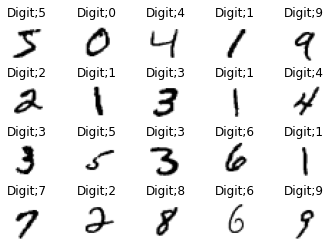

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i], cmap='gray_r')
  plt.title("Digit;{}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
print('training images shape:', train_img.shape)
print('testing images shape:', test_img.shape)


training images shape: (60000, 28, 28)
testing images shape: (10000, 28, 28)


(60000,28,28) means that there are 60,000 images in the training set and each image has a size of 28x28 pixels. Similarly, there are 10,000 images of the same size in the test set.

So each image is 28x28 pixels in size, or 784 features, and each feature represents the intensity of each pixel from 0 to 255.

You can use print(train_img[0]) to print the first image in the training set as a 28x28 matrix.

Text(0.5, 0, 'Intensity')

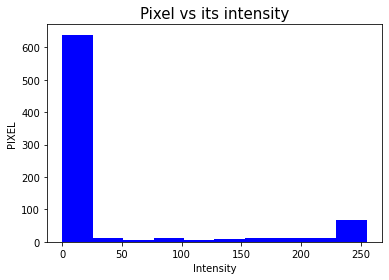

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('Pixel vs its intensity',fontsize= 15)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

We have plotted the first training image on a histogram. Before normalisation.
hist() is used to plot the histogram of the first training image, i.e. train_img[0]. The image has been reshaped into a 1-D array of size 784. facecolor is an optional parameter that specifies the colour of the histogram. The histogram title, Y-axis and X-axis have been named "Pixel vs. its intensity", "PIXEL" and "Intensity".

# **PRE-PROCESSING THE DATA**

Before sending the data to the network, we will normalise it. Normalizing the input data speeds up the learning process. It also reduces the risk of deadlock in the local optima, as we use stochastic gradient descent to find the optimal weights of the network.

The pixel values are between 0 and 255. Scaling the input values is a good thing when using neural network models, as the scale is well known and behaves well. We can very quickly normalise the pixel values in the range 0 and 1 by dividing each value by the maximum intensity of 255.


In [ ]:
train_img = train_img/255.0
test_img = test_img/255.0

Results after normalisation

Text(0.5, 0, 'Intensity')

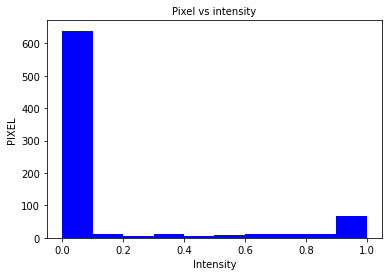

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('Pixel vs intensity', fontsize=10)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')


# **Création de model**

There are three ways to create a model in Keras:

The sequential model is very direct and simple. It allows you to build a model layer by layer.

The Functional API, which is an easy-to-use, full-featured API that supports arbitrary model architectures. This is the "industrial" model of Keras.

The sub-classification of models, where you implement everything from scratch.

Here we have used the sequential model. This model has an input layer, an output layer and two hidden layers.

Sequential() is used to create a network layer in sequence.

.add() is used here to add the layer to the model.

In the first layer (input layer), we feed the image as input. As each image has a size of 28x28, we used Flatten() to compress the input.

We used Dense() in the other layers. This ensures that every neuron in the previous layer is connected to every neuron in the next layer.

The model is a simple neural network with two hidden layers of 512 neurons. A rectified linear unit (ReLU) activation function is used for the hidden layer neurons. Most interestingly, its gradient is always equal to 1, which allows us to pass the maximum number of errors through the network during backpropagation.

The output layer has 10 neurons, i.e. for each class from 0 to 9. A softmax activation function is used on the output layer to transform the outputs into probability type values.

In [ ]:
from keras.layers.core.flatten import Flatten
from keras.models import Sequential
from keras.layers import  Flatten, Dense

model= Sequential()

input_layer = Flatten(input_shape=(28,28))
model.add(input_layer)

hidden_layer1=Dense(512,activation='relu' )
model.add(hidden_layer1)

hidden_layer2=Dense(512,activation='relu' )
model.add(hidden_layer2)

output_layer=Dense(10,activation='softmax' )
model.add(output_layer)



# **Compilation de réseaux**
Next, we need to compile our model. The compilation of the model takes three parameters: the optimizer, the loss and the metrics. The optimizer controls the learning rate. We use 'adam' as the optimizer. It is generally a good optimizer to use in many cases. It adjusts the learning rate throughout the training.

We will use 'Sparse_Categorical_Crossentropy' for our loss function as it saves memory and computation time as it simply uses a single integer for a class, rather than an integer vector. A lower score indicates that the model performs better.

In order to determine accuracy, we will use the "accuracy" metric to see the accuracy score on the validation set when we train the model.

In [ ]:
#compiling the sequential model 
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# **TRAINING THE MODEL**

We will train the model using the fit() function. It will have as parameters the training data (train_img), the training labels (train_lab) and the number of epochs. The number of epochs is the number of times the model will run through the data. The higher the number of epochs, the better the model becomes, up to a certain point. After this point, the model will stop improving with each epoch.

In [ ]:
model.fit(train_img, train_lab, epochs= 100)

Epoch 1/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1839 - accuracy: 0.9444
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0810 - accuracy: 0.9752
Epoch 3/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0559 - accuracy: 0.9824
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 6/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0279 - accuracy: 0.9907
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0270 - accuracy: 0.9917
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 9/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0200 - accuracy: 0.9939
Epoch 10/100
1875/1875 [==============================] - 15s 8m

In [ ]:
model.save('project.h5')

EVALUATE THE MODEL


In [ ]:
loss_and_acc = model.evaluate(test_img,test_lab,verbose= 2)
print("Test loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])


313/313 - 1s - loss: 0.5214 - accuracy: 0.9826 - 1s/epoch - 4ms/step
Test loss 0.5214496850967407
Test Accuracy 0.9825999736785889


The model.evaluate() method calculates the loss and any metrics defined when the model was compiled. Thus, in our case, the accuracy is calculated over the 10,000 test examples using the network weights given by the saved model.
Verbose can be 0, 1 or 2. By default, verbose is 1.
verbose = 0, means silent.
verbose = 1, which includes the progress bar and one line per epoch.
verbose = 2, one line per epoch, i.e. the number of epochs / the total number of epochs.

Having evaluated the model, we will now check the model for the test section.

TESTING

Predict Value: 7
Successful prediction


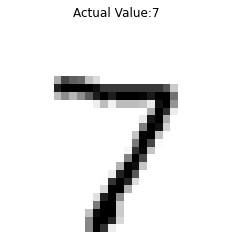

In [ ]:
plt.imshow(test_img[0], cmap='gray_r')
plt.title('Actual Value:{}'.format(test_lab[0]))
prediction = model.predict(test_img)
plt.axis('off')
print('Predict Value:', np.argmax(prediction[0]))
if (test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')
  

model.predict() is used to make a prediction on the test set.

Now, in order to make a prediction for a new image that is not part of the MNIST dataset. We will first create a function named "load_image".



In [ ]:
#makeaprediction foranew image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model

#load and prepare the image
def load_image(filename):
  
 #load the image
 img= load_img(filename,grayscale=True,target_size=(28,28))

 #convert to array
 img = img_to_array(img)

 #reshape intoasingle sample with1channel
 img=img.reshape(1,28,28)

 #prepare pixel data
 img=img.astype('float32')
 img=img/255.0
 return img

The above function converts the image into an array of pixels which is passed to the model as INPUT.